# Feasibility

In [25]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, f1_score


# data generators 
train_dir = '/Users/jomus/Code/summer/summerepo/Compvision/data/train'
validation_dir = '/Users/jomus/Code/summer/summerepo/Compvision/data/validation'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary',
        shuffle=False) # THIS LINE IMPORTANT


Found 464 images belonging to 2 classes.
Found 116 images belonging to 2 classes.


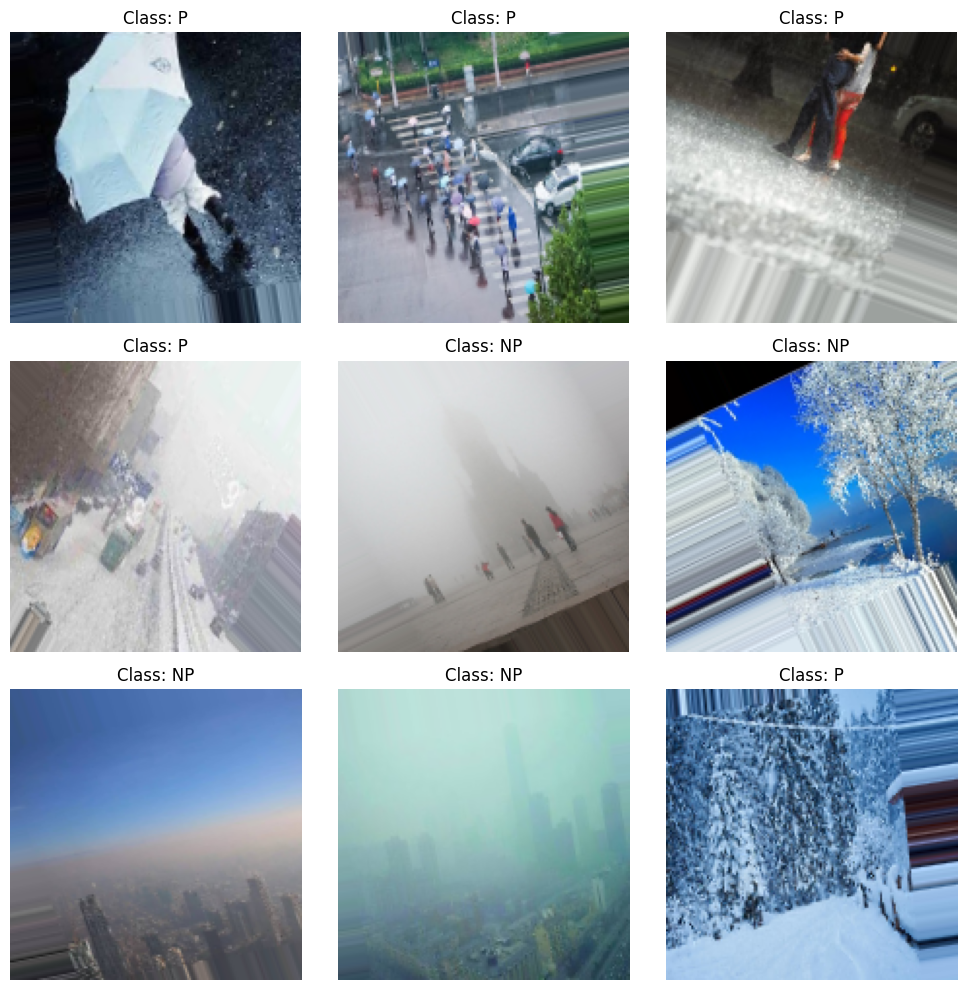

In [26]:

# get augmented images , get mapping from class index to class name, and plotting the first 9
augmented_images, augmented_labels = next(train_generator)

class_names = {v: k for k, v in train_generator.class_indices.items()}

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i])
    class_name = class_names[int(augmented_labels[i])]
    plt.title(f"Class: {class_name}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [27]:
# defining and compiling FEASIBILITY
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
conv_base.trainable = False  # Keep the base frozen

model = models.Sequential([
    conv_base,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['accuracy'])

# only training for a few
print(" Starting Feasibility Training ")
history = model.fit(
      train_generator,
      steps_per_epoch=29,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=6)



 Starting Feasibility Training 
Epoch 1/10


/Users/jomus/Code/tf_env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 210ms/step - accuracy: 0.6501 - loss: 0.6451 - val_accuracy: 0.7672 - val_loss: 0.5488
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 193ms/step - accuracy: 0.7981 - loss: 0.5059 - val_accuracy: 0.8448 - val_loss: 0.4614
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 191ms/step - accuracy: 0.8266 - loss: 0.4344 - val_accuracy: 0.8621 - val_loss: 0.4063
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 208ms/step - accuracy: 0.8549 - loss: 0.3907 - val_accuracy: 0.8879 - val_loss: 0.3680
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 200ms/step - accuracy: 0.8228 - loss: 0.3851 - val_accuracy: 0.8966 - val_loss: 0.3435
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 200ms/step - accuracy: 0.8840 - loss: 0.3303 - val_accuracy: 0.8966 - val_loss: 0.3232
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 192ms/step - accuracy: 0.8668 - loss: 0.3081 - val_accuracy: 0.8966 - val_loss: 0.3083
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 201ms/step - accuracy: 0.8765 - loss: 0.3154 - val_accuracy: 0.8966 - val_


Plotting Feasibility Results 


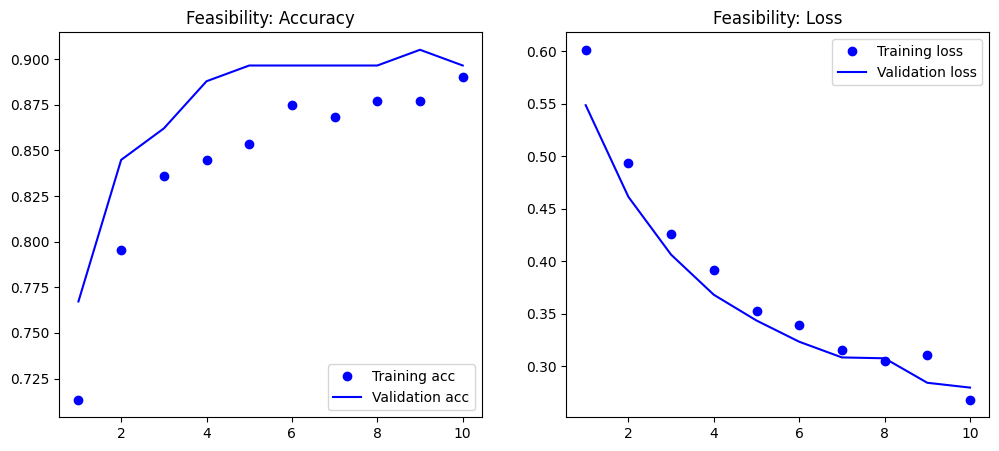

In [28]:
print("\nPlotting Feasibility Results ")
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Feasibility: Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Feasibility: Loss')
plt.legend()

plt.show()

Frozen head, simple base with really promising results

In [29]:

print(" Evaluating Feasibility Model")

# just to be safe
validation_generator.reset()

# Make predictions
# The 'model' variable currently holds the trained feasibility model
predictions = model.predict(validation_generator, steps=validation_generator.n // validation_generator.batch_size + 1)
predicted_classes = (predictions > 0.5).astype(int).flatten()
true_classes = validation_generator.classes

# metrics
print(f"Feasibility Model F1 Score: {f1_score(true_classes, predicted_classes):.4f}")
print("\nFeasibility Model Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=['No Precipitation', 'Precipitation']))

 Evaluating Feasibility Model
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step
Feasibility Model F1 Score: 0.8966

Feasibility Model Classification Report:
                  precision    recall  f1-score   support

No Precipitation       0.90      0.90      0.90        58
   Precipitation       0.90      0.90      0.90        58

        accuracy                           0.90       116
       macro avg       0.90      0.90      0.90       116
    weighted avg       0.90      0.90      0.90       116



setting shuffle to false yielding very reasonable results for short test

# Prototype

In [30]:


#defining model
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
model = models.Sequential([
    conv_base,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

# classifier head
conv_base.trainable = False
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['accuracy'])

print("--- Starting Prototype Initial Training ---")
model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size,
    verbose=0)




# fine tuning
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['accuracy'])

print("\n Starting Prototype Fine Tuning  ")
history_final = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size,
    verbose=2)







--- Starting Prototype Initial Training ---


/Users/jomus/Code/tf_env/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



 Starting Prototype Fine Tuning  
Epoch 1/20
23/23 - 9s - 410ms/step - accuracy: 0.8468 - loss: 0.3209 - val_accuracy: 0.8900 - val_loss: 0.2652
Epoch 2/20
23/23 - 1s - 57ms/step - accuracy: 0.8000 - loss: 0.3979 - val_accuracy: 0.8800 - val_loss: 0.2876
Epoch 3/20
23/23 - 7s - 300ms/step - accuracy: 0.8694 - loss: 0.3015 - val_accuracy: 0.9000 - val_loss: 0.2484
Epoch 4/20
23/23 - 1s - 54ms/step - accuracy: 0.8500 - loss: 0.3813 - val_accuracy: 0.9000 - val_loss: 0.2485
Epoch 5/20
23/23 - 7s - 287ms/step - accuracy: 0.8964 - loss: 0.2682 - val_accuracy: 0.8900 - val_loss: 0.2538
Epoch 6/20
23/23 - 1s - 53ms/step - accuracy: 1.0000 - loss: 0.1430 - val_accuracy: 0.9100 - val_loss: 0.2266
Epoch 7/20
23/23 - 7s - 284ms/step - accuracy: 0.9167 - loss: 0.2165 - val_accuracy: 0.9300 - val_loss: 0.2096
Epoch 8/20
23/23 - 1s - 52ms/step - accuracy: 0.7500 - loss: 0.5093 - val_accuracy: 0.9000 - val_loss: 0.2234
Epoch 9/20
23/23 - 6s - 278ms/step - accuracy: 0.8986 - loss: 0.2660 - val_accura

Building on the feasibility model by fine tuning the top layers of VGG16, adding dropout for regularization, and increasing epochs.

Addressing overfitting and improve generalization without overcomplicating the model.

In [31]:
print("\n Evaluating Final Prototype NO CLASS WEIGHTS")
validation_generator.reset()
predictions = model.predict(validation_generator, steps=validation_generator.n // validation_generator.batch_size + 1)
predicted_classes = (predictions > 0.5).astype(int).flatten()
true_classes = validation_generator.classes




predicted_classes = predicted_classes[:len(true_classes)]

print(f"Final F1 Score: {f1_score(true_classes, predicted_classes):.4f}")
print("\nFinal Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=['No Precipitation', 'Precipitation']))

print(f"True classes shape: {true_classes.shape}")
print(f"Predicted classes shape: {predicted_classes.shape}")


 Evaluating Final Prototype NO CLASS WEIGHTS
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step
Final F1 Score: 0.9194

Final Classification Report:
                  precision    recall  f1-score   support

No Precipitation       0.98      0.84      0.91        58
   Precipitation       0.86      0.98      0.92        58

        accuracy                           0.91       116
       macro avg       0.92      0.91      0.91       116
    weighted avg       0.92      0.91      0.91       116

True classes shape: (116,)
Predicted classes shape: (116,)


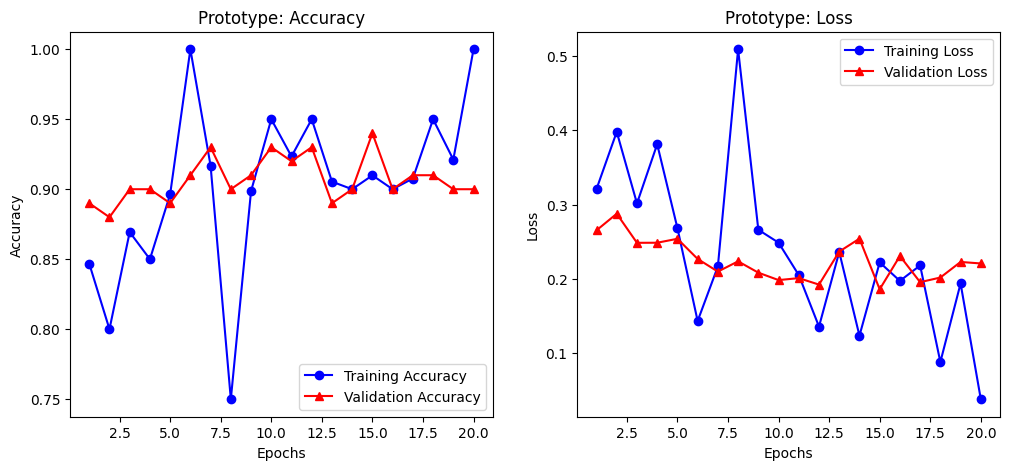

In [34]:

acc = history_final.history['accuracy']
val_acc = history_final.history['val_accuracy']
loss = history_final.history['loss']
val_loss = history_final.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

# Accuracy 
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r^-', label='Validation Accuracy')
plt.title('Prototype: Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss 
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r^-', label='Validation Loss')
plt.title('Prototype: Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


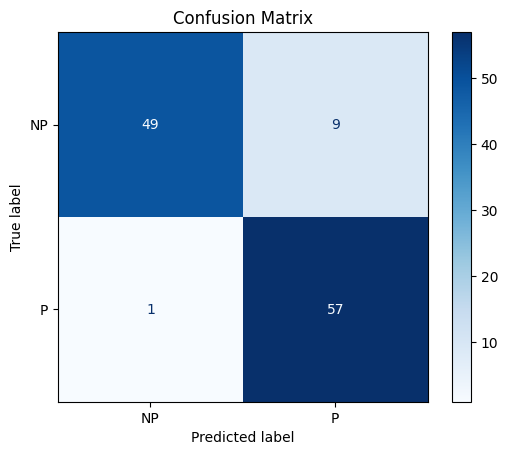

In [35]:

cm = confusion_matrix(true_classes, predicted_classes)
labels = ['NP', 'P']

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix")
plt.show()


final model generalizes well despite noise, unstable likely due to small data and our strong augmentations
